In [1]:
!pip install pandas
!pip install sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

!pip install tensorflow-gpu
import tensorflow as tf

!pip install keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import matplotlib.pyplot as plt #2d plotting
from pandas.tools.plotting import scatter_matrix  # scatter plot matrix
from scipy.stats import uniform  # for training-and-test split
%config IPCompleter.greedy=True #tabbing for autocomplete
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox
import warnings
import matplotlib.pyplot as plt

!pip install cufflinks
import cufflinks as cf
import plotly 
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
from sklearn.metrics import confusion_matrix


!pip install idx2numpy
import idx2numpy
from keras.optimizers import SGD


Using TensorFlow backend.


In [2]:
x_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
x_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

#normalize by dividing by max value 
x_train = x_train/255
x_test = x_test/255

#Convert to support GPU computation (Deep Learning with Keras)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

#Convert Dependent variable/Labels to Categorical variables per the number of class (digits- 0:9 = 10 total classes)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Set the CNN model 

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))



model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10))

model.add(Activation('softmax'))

np.random.seed(1234) #set random seed for reproducibility


NB_EPOCH = 10
#NB_EPOCH = 50
BATCH_SIZE = 50
#BATCH_SIZE = 50
VERBOSE = 1 #This sets Verbose to true meaning that logging output will be displayed on screen. Verbose = 0 is default and does allow model to run faster.
NB_CLASSES = 10
OPTIMIZER = SGD() #Could also use Adam or RMSprop here.
#OPTIMIZER = ADAM()
VALIDATION_SPLIT = .2

In [10]:
sess.close()
with tf.device('/gpu:0'):
    model.compile(loss = 'categorical_crossentropy', optimizer= OPTIMIZER, metrics=['accuracy'])

    sess = tf.Session(config=tf.ConfigProto(
      allow_soft_placement=True, log_device_placement=True))
    history = model.fit(x_train, y_train, batch_size= BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split= VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 343us/step - loss: 0.3960 - acc: 0.8815 - val_loss: 0.0867 - val_acc: 0.9753
Epoch 2/10
48000/48000 [==============================] - 14s 298us/step - loss: 0.1235 - acc: 0.9649 - val_loss: 0.0556 - val_acc: 0.9829
Epoch 3/10
48000/48000 [==============================] - 14s 298us/step - loss: 0.0859 - acc: 0.9757 - val_loss: 0.0486 - val_acc: 0.9855
Epoch 4/10
48000/48000 [==============================] - 14s 298us/step - loss: 0.0708 - acc: 0.9802 - val_loss: 0.0398 - val_acc: 0.9878
Epoch 5/10
48000/48000 [==============================] - 14s 297us/step - loss: 0.0596 - acc: 0.9828 - val_loss: 0.0387 - val_acc: 0.9881
Epoch 6/10
48000/48000 [==============================] - 14s 297us/step - loss: 0.0522 - acc: 0.9849 - val_loss: 0.0354 - val_acc: 0.9897
Epoch 7/10
48000/48000 [==============================] - 14s 297us/step - loss: 0.0461 - acc: 0.9866 - val_loss: 0.

10000/10000 [==============================] - 2s 152us/step
Accuracy on test set = 0.9914


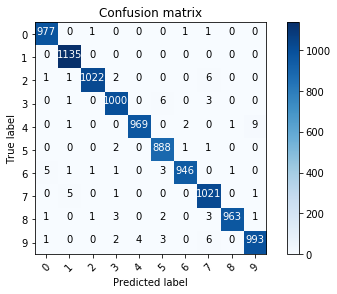

In [11]:
np.random.seed(1234) #set random seed for reproducibility

score = model.evaluate(x_test, y_test, verbose=VERBOSE)
print("Accuracy on test set =", score[1])

predicted = model.predict_classes(x_test)


# Look at confusion matrix 
#https://yashk2810.github.io/Applying-Convolutional-Neural-Network-on-the-MNIST-dataset/
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))




In [12]:
from sklearn.metrics import classification_report 
print(classification_report(Y_true, Y_pred_classes))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       980
          1       0.99      1.00      1.00      1135
          2       1.00      0.99      0.99      1032
          3       0.99      0.99      0.99      1010
          4       1.00      0.99      0.99       982
          5       0.98      1.00      0.99       892
          6       1.00      0.99      0.99       958
          7       0.98      0.99      0.99      1028
          8       1.00      0.99      0.99       974
          9       0.99      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000

